In [1]:
import numpy as np
from numpy import linalg as LA
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["figure.figsize"] = (20,20)

In [2]:
#original image
orig = Image.open("mandelbrotbw.png")

#converting into matrix
image = Image.open("mandelbrotbw.png").convert('L')
image = np.asarray(image)

#Let the image be a matrix A of NXN dimension
#converting from 255 scale to 1 
A = (image/255).astype(int)

In [3]:
#dimensions of matrix A
A.shape

(217, 217)

In [4]:
A[:100][:100]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

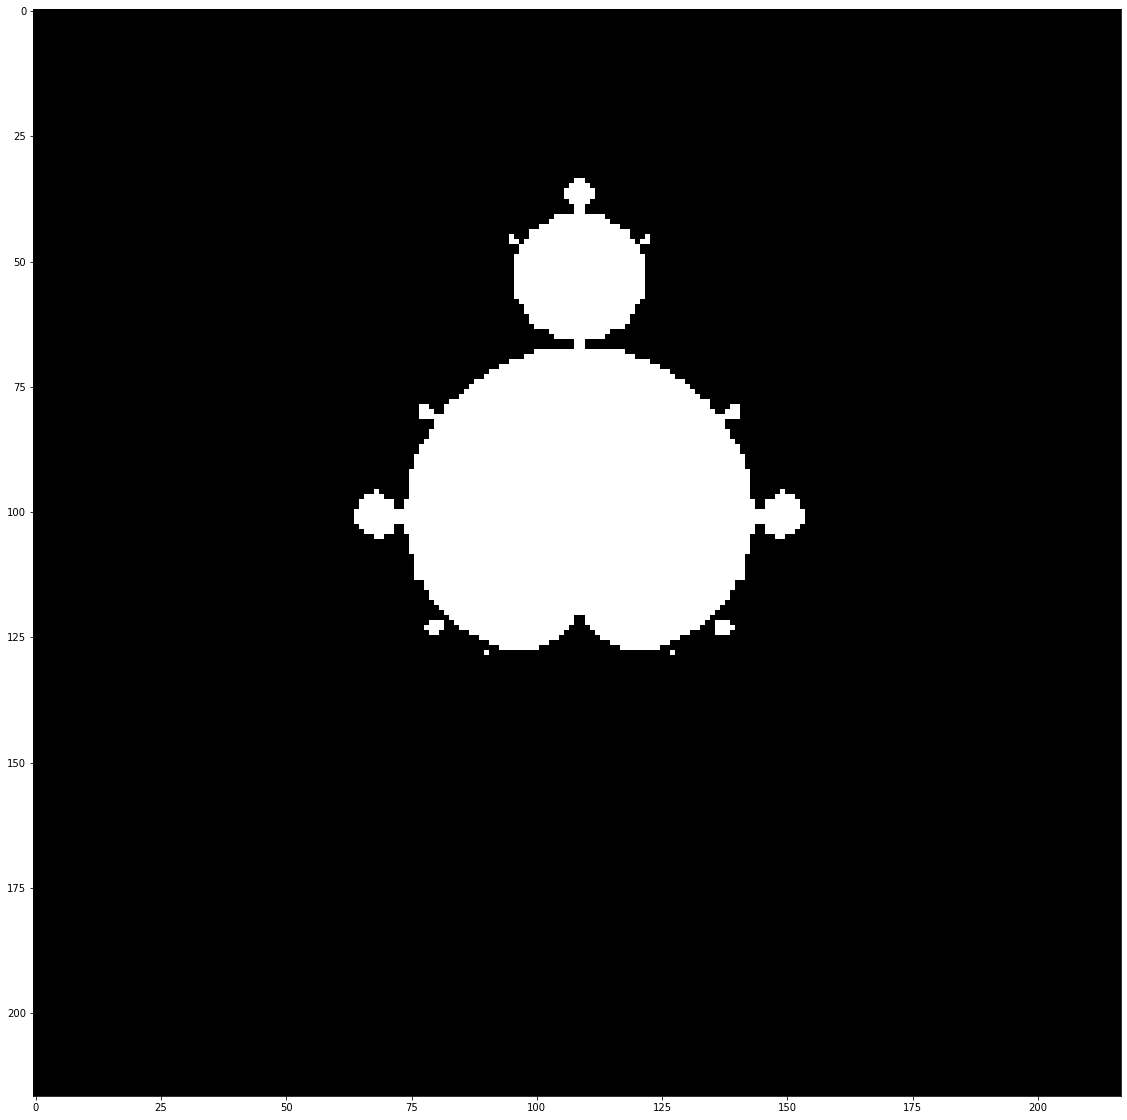

In [5]:
#grayscaled image
plt.imshow(A,interpolation='None',cmap='gray')

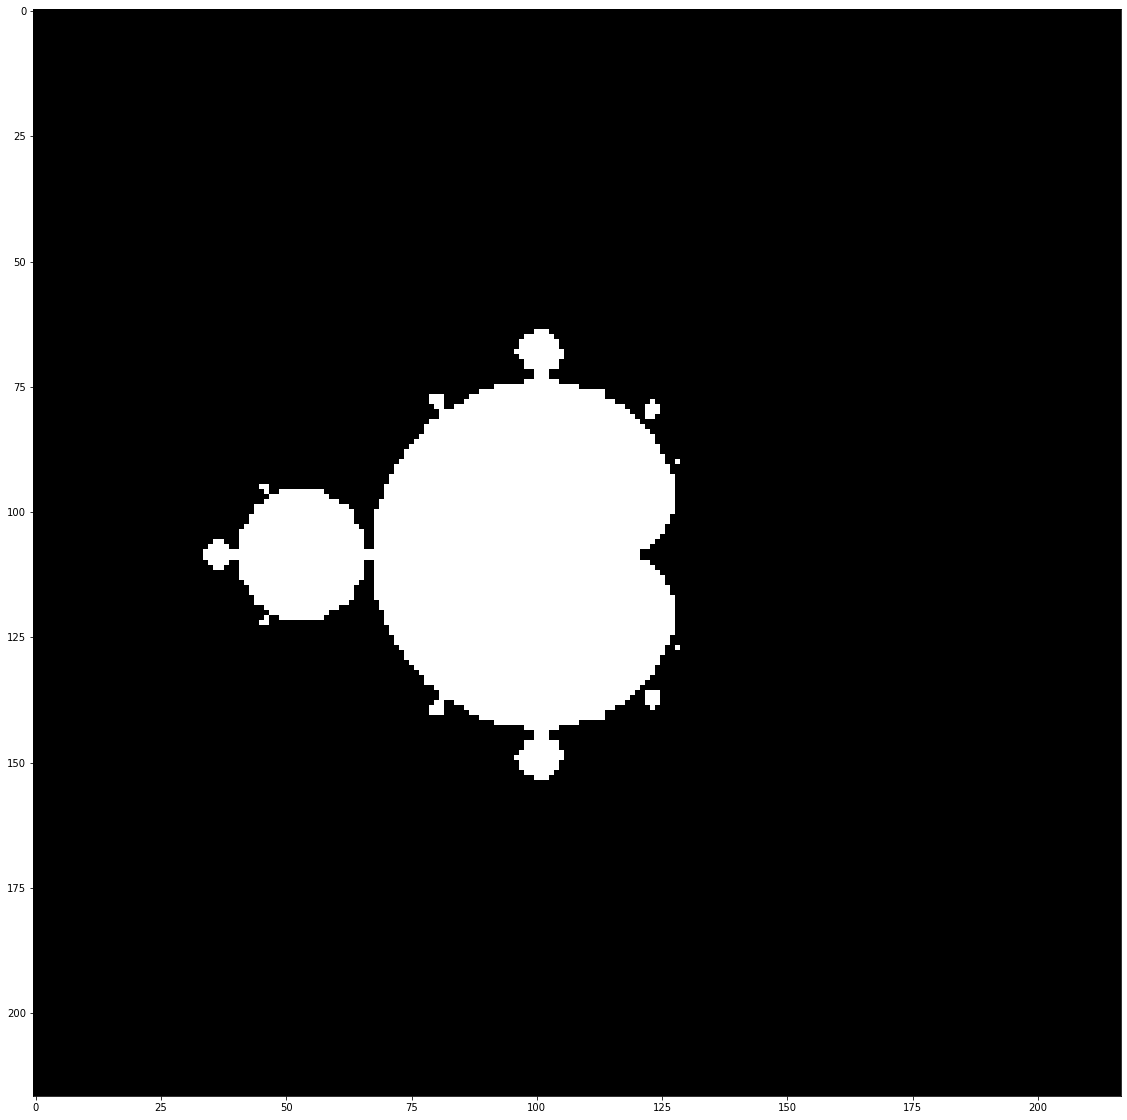

In [6]:
#transposing matrix A
AT = np.transpose(A) 
plt.imshow(AT,interpolation='None',cmap='gray')

In [7]:
l_U, U= LA.eigh(AT @ A)
#U_real= np.real_if_close(U, tol=1)
#U_real
l_U = np.round(l_U, 4)
U = np.round(U,4)

print("eigenvalues of U = ", l_U)
print("eigenVECTORS of U = ", U)

eigenvalues of U =  [-0.000000e+00 -0.000000e+00 -0.000000e+00 -0.000000e+00 -0.000000e+00
 -0.000000e+00 -0.000000e+00 -0.000000e+00 -0.000000e+00 -0.000000e+00
 -0.000000e+00 -0.000000e+00 -0.000000e+00 -0.000000e+00 -0.000000e+00
 -0.000000e+00 -0.000000e+00 -0.000000e+00 -0.000000e+00 -0.000000e+00
 -0.000000e+00 -0.000000e+00 -0.000000e+00 -0.000000e+00 -0.000000e+00
 -0.000000e+00 -0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 

In [8]:
"""Constructing V vector, 


Columns of V are eigenvalues in the same order. U[allrows, cols sorted by indirectly (argsort)
in decending order (-1)] 

"""
V = U[:,l_U.argsort()[::-1]]
print(V)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


$$\Sigma$$ matrix is = 
 [[57.74426378  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         18.36497482  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         11.25521657 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
  -0.        ]]
vector V is =  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


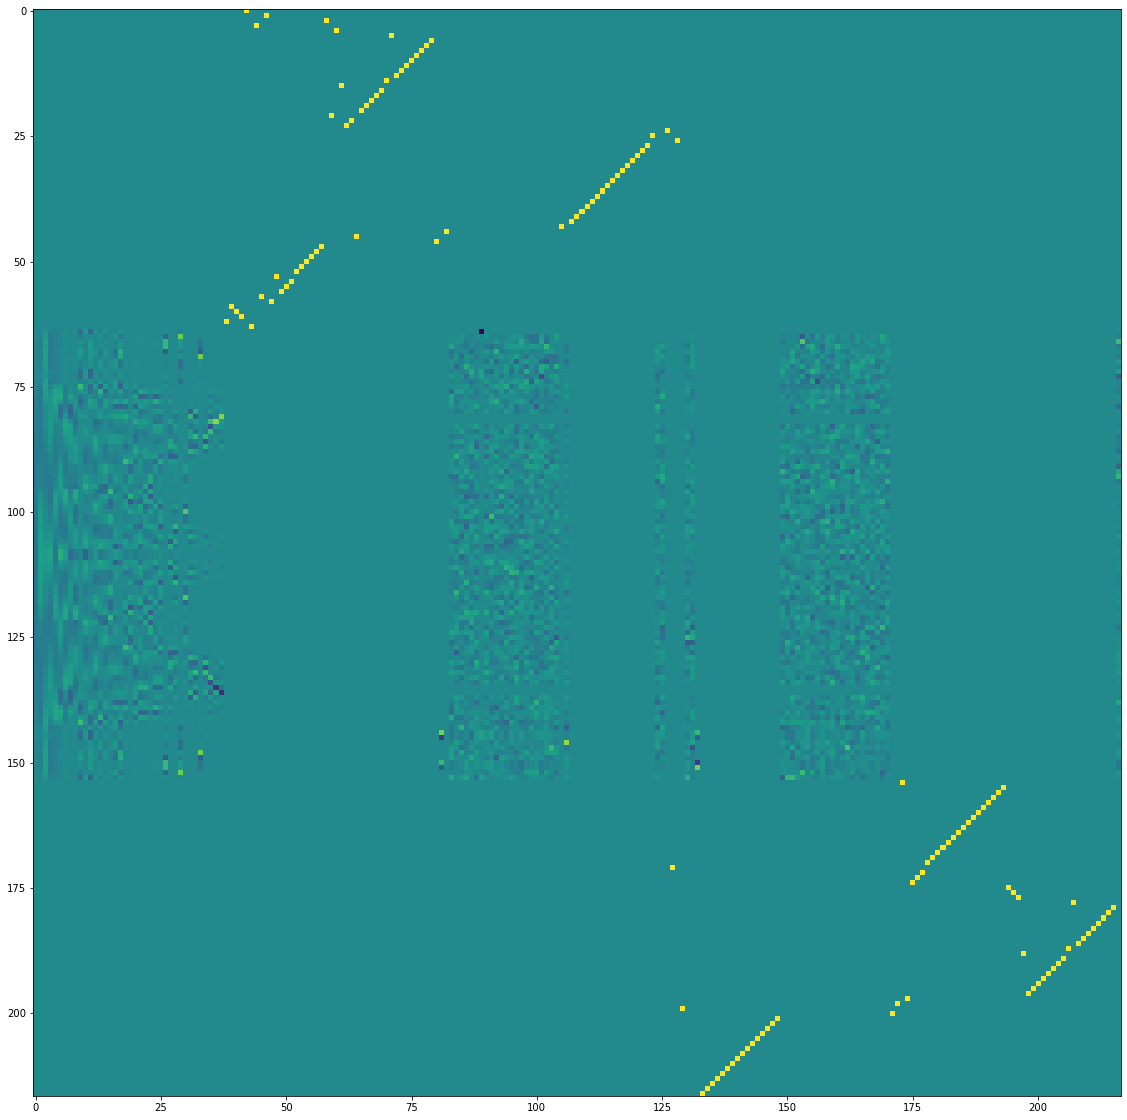

In [9]:
"""Constructing Sigma Matrix,

where diagonals entries of \sigma, the magintude of Av_i


"""
l_sort = np.sort(l_U)[::-1]
#l_sort = l_sort[l_sort > 1e-8] #throw out insignificant zeros
lil_sigma = np.sqrt(l_sort)

#initializing big sigma matrix with mxn, this is also a square matrix
big_sigma = np.zeros((A.shape[0],A.shape[1]))
#filling diagonals with sigma values
big_sigma[:min(A.shape[0],A.shape[1]), :min(A.shape[0],A.shape[1])] = np.diag(lil_sigma)

print("$$\Sigma$$ matrix is = \n", big_sigma)
print("vector V is = ", V)
plt.imshow(V)

In [10]:
r = len(lil_sigma)


#normalzing matrix with magnitude lil_sigma, ignore warnings about dividing by zero
U_nan = A @ V[:,:r]/lil_sigma
U = np.nan_to_num(U_nan, copy=True, nan=0.0, posinf=None, neginf=None)
#U
#plt.imshow(U)

/tmp/ipykernel_195077/1112451322.py:5: RuntimeWarning: divide by zero encountered in true_divide
  U_nan = A @ V[:,:r]/lil_sigma
/tmp/ipykernel_195077/1112451322.py:5: RuntimeWarning: invalid value encountered in true_divide
  U_nan = A @ V[:,:r]/lil_sigma


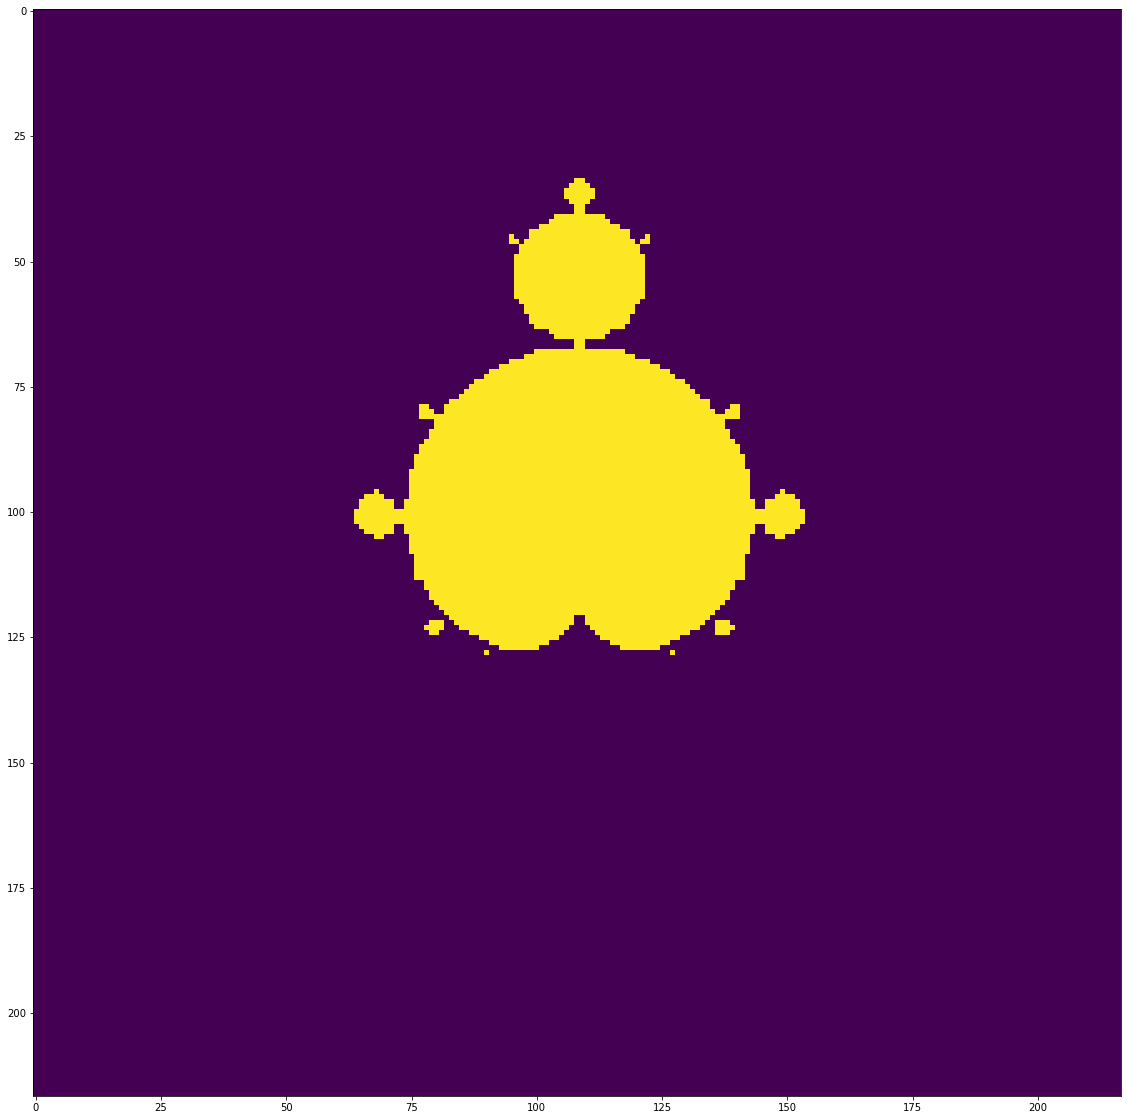

In [11]:
A_reconstructed = U @ big_sigma @ np.transpose(V)
plt.imshow(A_reconstructed)

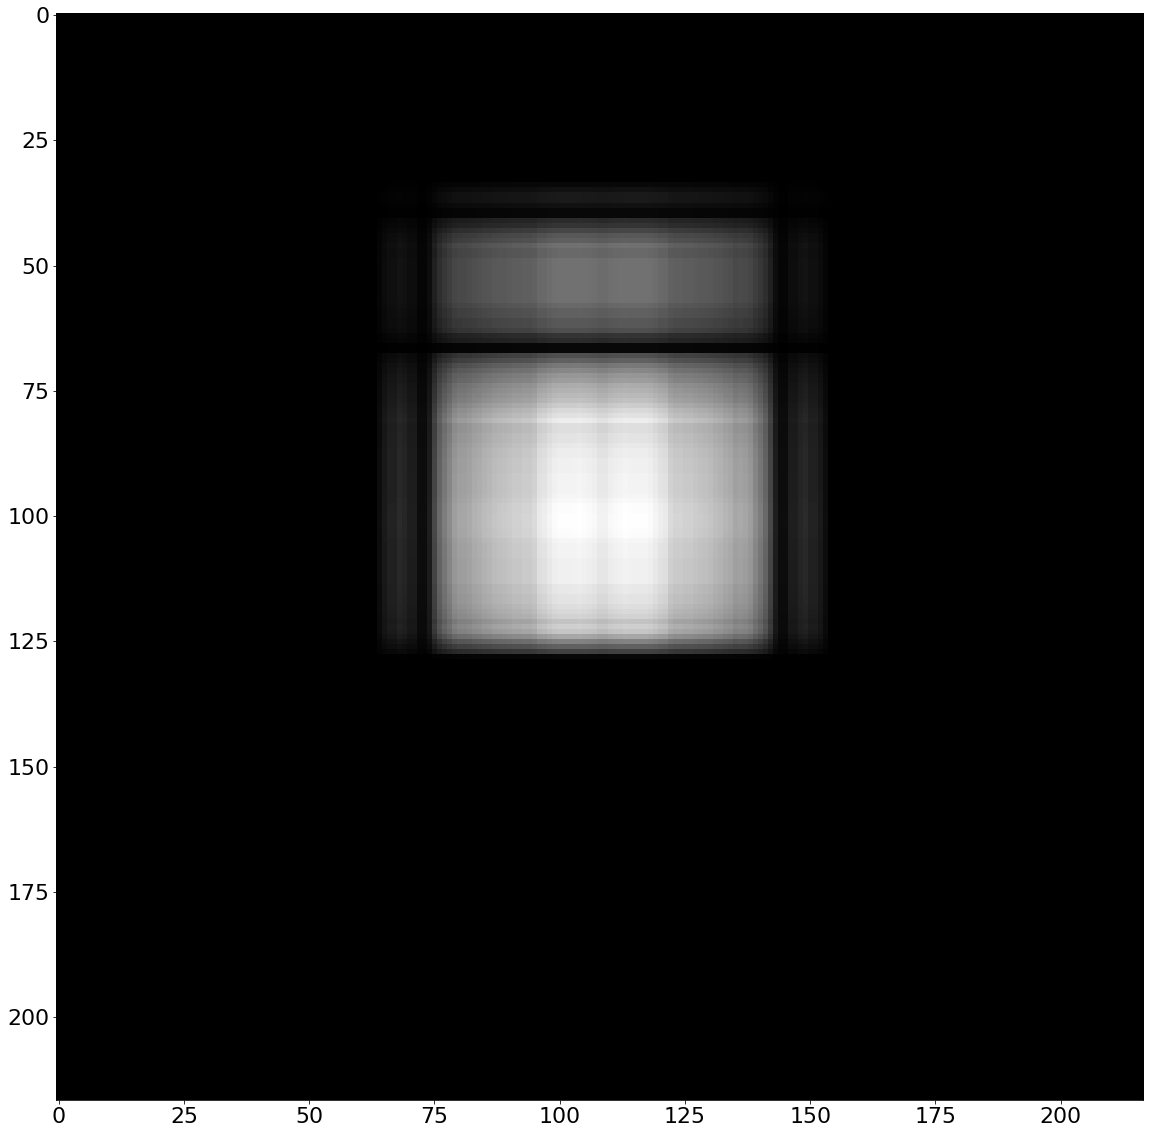

In [24]:
k = 1

mat_approx = U[:, :k] @ big_sigma[:k, :k] @ np.transpose(V)[:k, :]
plt.imshow(mat_approx,cmap="gray")

In [21]:
def anim_func(k):
    mat_approx = U[:, :k] @ big_sigma[:k, :k] @ np.transpose(V)[:k, :]
    return mat_approx

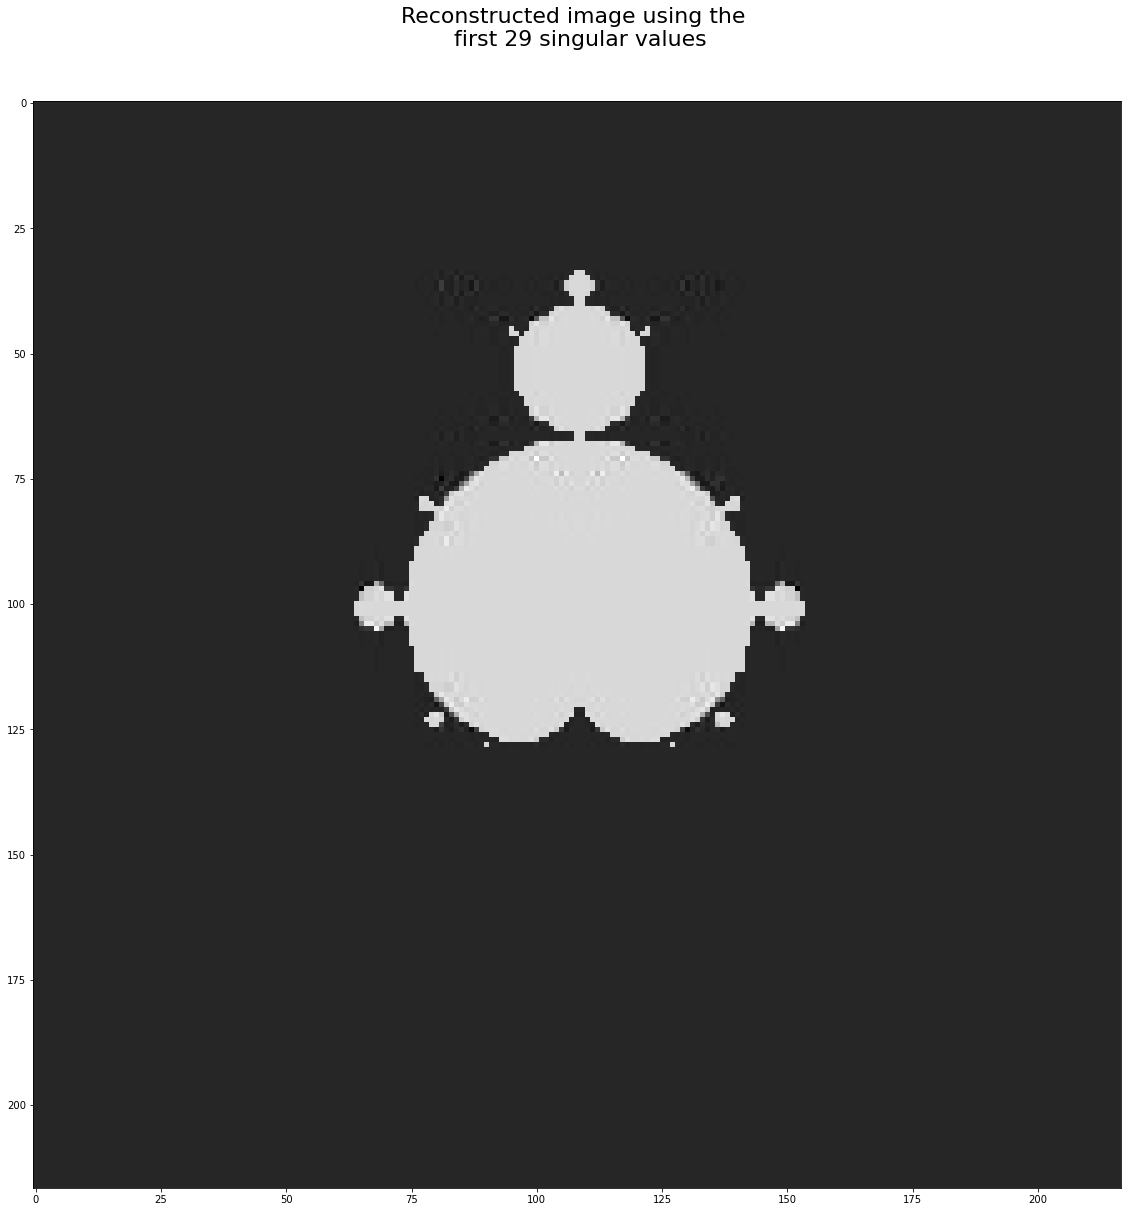

In [23]:
tot_frames = [anim_func(k) for k in range(30)]
fig, ax = plt.subplots() 
frames=[]
for i in range(len(tot_frames)):
    img = plt.imshow(tot_frames[i], animated=True, cmap="gray")
    title = ax.text(0.5,1.05,"Reconstructed image using the \n first {} singular values".format(i), 
                    size=plt.rcParams["axes.titlesize"],
                    fontsize = plt.rcParams.update({'font.size': 22}),
                    ha="center", 
                    transform=ax.transAxes)
    frames.append([img,title])

    
ani = animation.ArtistAnimation(fig, frames, interval=1, blit=False, repeat_delay=1000)
ani.save("custom_svd.gif")

In [ ]:
print(U.shape)
print(big_sigma.shape)
print(V.shape)
print(r)